In [38]:
import pandas as pd
import numpy as np
from numpy import NaN
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


# New Section

To read the train csv file

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/UW Madison dataset/train.csv')
df.describe()

,id,class,segmentation
count,115488,115488,33913
unique,38496,3,33899
top,case123_day20_slice_0001,large_bowel,12629 10 12894 12 13158 15 13423 17 13688 19 1...
freq,3,38496,2


In [5]:
df.head(10)

,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN
5,case123_day20_slice_0002,stomach,NaN
6,case123_day20_slice_0003,large_bowel,NaN
7,case123_day20_slice_0003,small_bowel,NaN
8,case123_day20_slice_0003,stomach,NaN
9,case123_day20_slice_0004,large_bowel,NaN


To split the image folder name to retrieve details about the number of cases and other details related to it

In [6]:
df[['Case','Day','Slice']]=df.id.str.split('_',n=2,expand=True)
df.head()

,id,class,segmentation,Case,Day,Slice
0,case123_day20_slice_0001,large_bowel,NaN,case123,day20,slice_0001
1,case123_day20_slice_0001,small_bowel,NaN,case123,day20,slice_0001
2,case123_day20_slice_0001,stomach,NaN,case123,day20,slice_0001
3,case123_day20_slice_0002,large_bowel,NaN,case123,day20,slice_0002
4,case123_day20_slice_0002,small_bowel,NaN,case123,day20,slice_0002


In [7]:
df.describe()

,id,class,segmentation,Case,Day,Slice
count,115488,115488,33913,115488,115488,115488
unique,38496,3,33899,85,35,144
top,case123_day20_slice_0001,large_bowel,12629 10 12894 12 13158 15 13423 17 13688 19 1...,case36,day0,slice_0001
freq,3,38496,2,2592,35040,822


In [8]:
df['Day'].unique()

array(['day20', 'day22', 'day0', 'day18', 'day25', 'day23', 'day24',
       'day27', 'day16', 'day14', 'day38', 'day36', 'day19', 'day12',
       'day17', 'day34', 'day26', 'day15', 'day28', 'day13', 'day10',
       'day21', 'day29', 'day32', 'day30', 'day6', 'day8', 'day11',
       'day35', 'day39', 'day1', 'day5', 'day2', 'day3', 'day4'],
      dtype=object)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  
sns.countplot(x='Case',hue='Day',data=df)  
plt.show() 

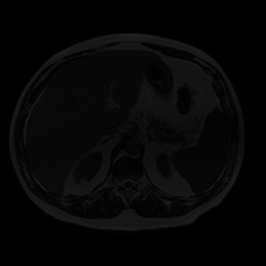

In [11]:
import cv2 as cv
from google.colab.patches import cv2_imshow
img1 = cv.imread('/content/drive/MyDrive/UW Madison dataset/case123/case123_day0/scans/slice_0065_266_266_1.50_1.50.png')
cv2_imshow(img1)

In [13]:
df123 = df.loc[df['Case'] == 'case123']
df123.describe()

,id,class,segmentation,Case,Day,Slice
count,1296,1296,375,1296,1296,1296
unique,432,3,375,1,3,144
top,case123_day20_slice_0001,large_bowel,28094 3 28358 7 28623 9 28889 9 29155 9 29421 ...,case123,day20,slice_0001
freq,3,432,1,1296,432,9


In [23]:
val = df123.loc[df123['id']=='case123_day0_slice_0065']
val

,id,class,segmentation,Case,Day,Slice
1056,case123_day0_slice_0065,large_bowel,21731 3 21995 7 22260 9 22525 10 22791 11 2305...,case123,day0,slice_0065
1057,case123_day0_slice_0065,small_bowel,NaN,case123,day0,slice_0065
1058,case123_day0_slice_0065,stomach,16380 7 16644 11 16909 14 17174 16 17439 18 17...,case123,day0,slice_0065


In [30]:
seg = val['segmentation'].tolist()
seg[0]

'21731 3 21995 7 22260 9 22525 10 22791 11 23056 12 23321 13 23587 13 23852 15 24118 16 24384 17 24650 17 24916 18 25182 18 25448 18 25713 19 25979 18 26245 18 26511 17 26777 17 27043 18 27309 18 27575 18 27841 18 28108 17 28374 17 28640 16 28906 15 29173 13 29439 13 29706 11 29973 10 30240 8 30508 4'

In [32]:
def rle2mask(mask_rle,shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (width,height) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

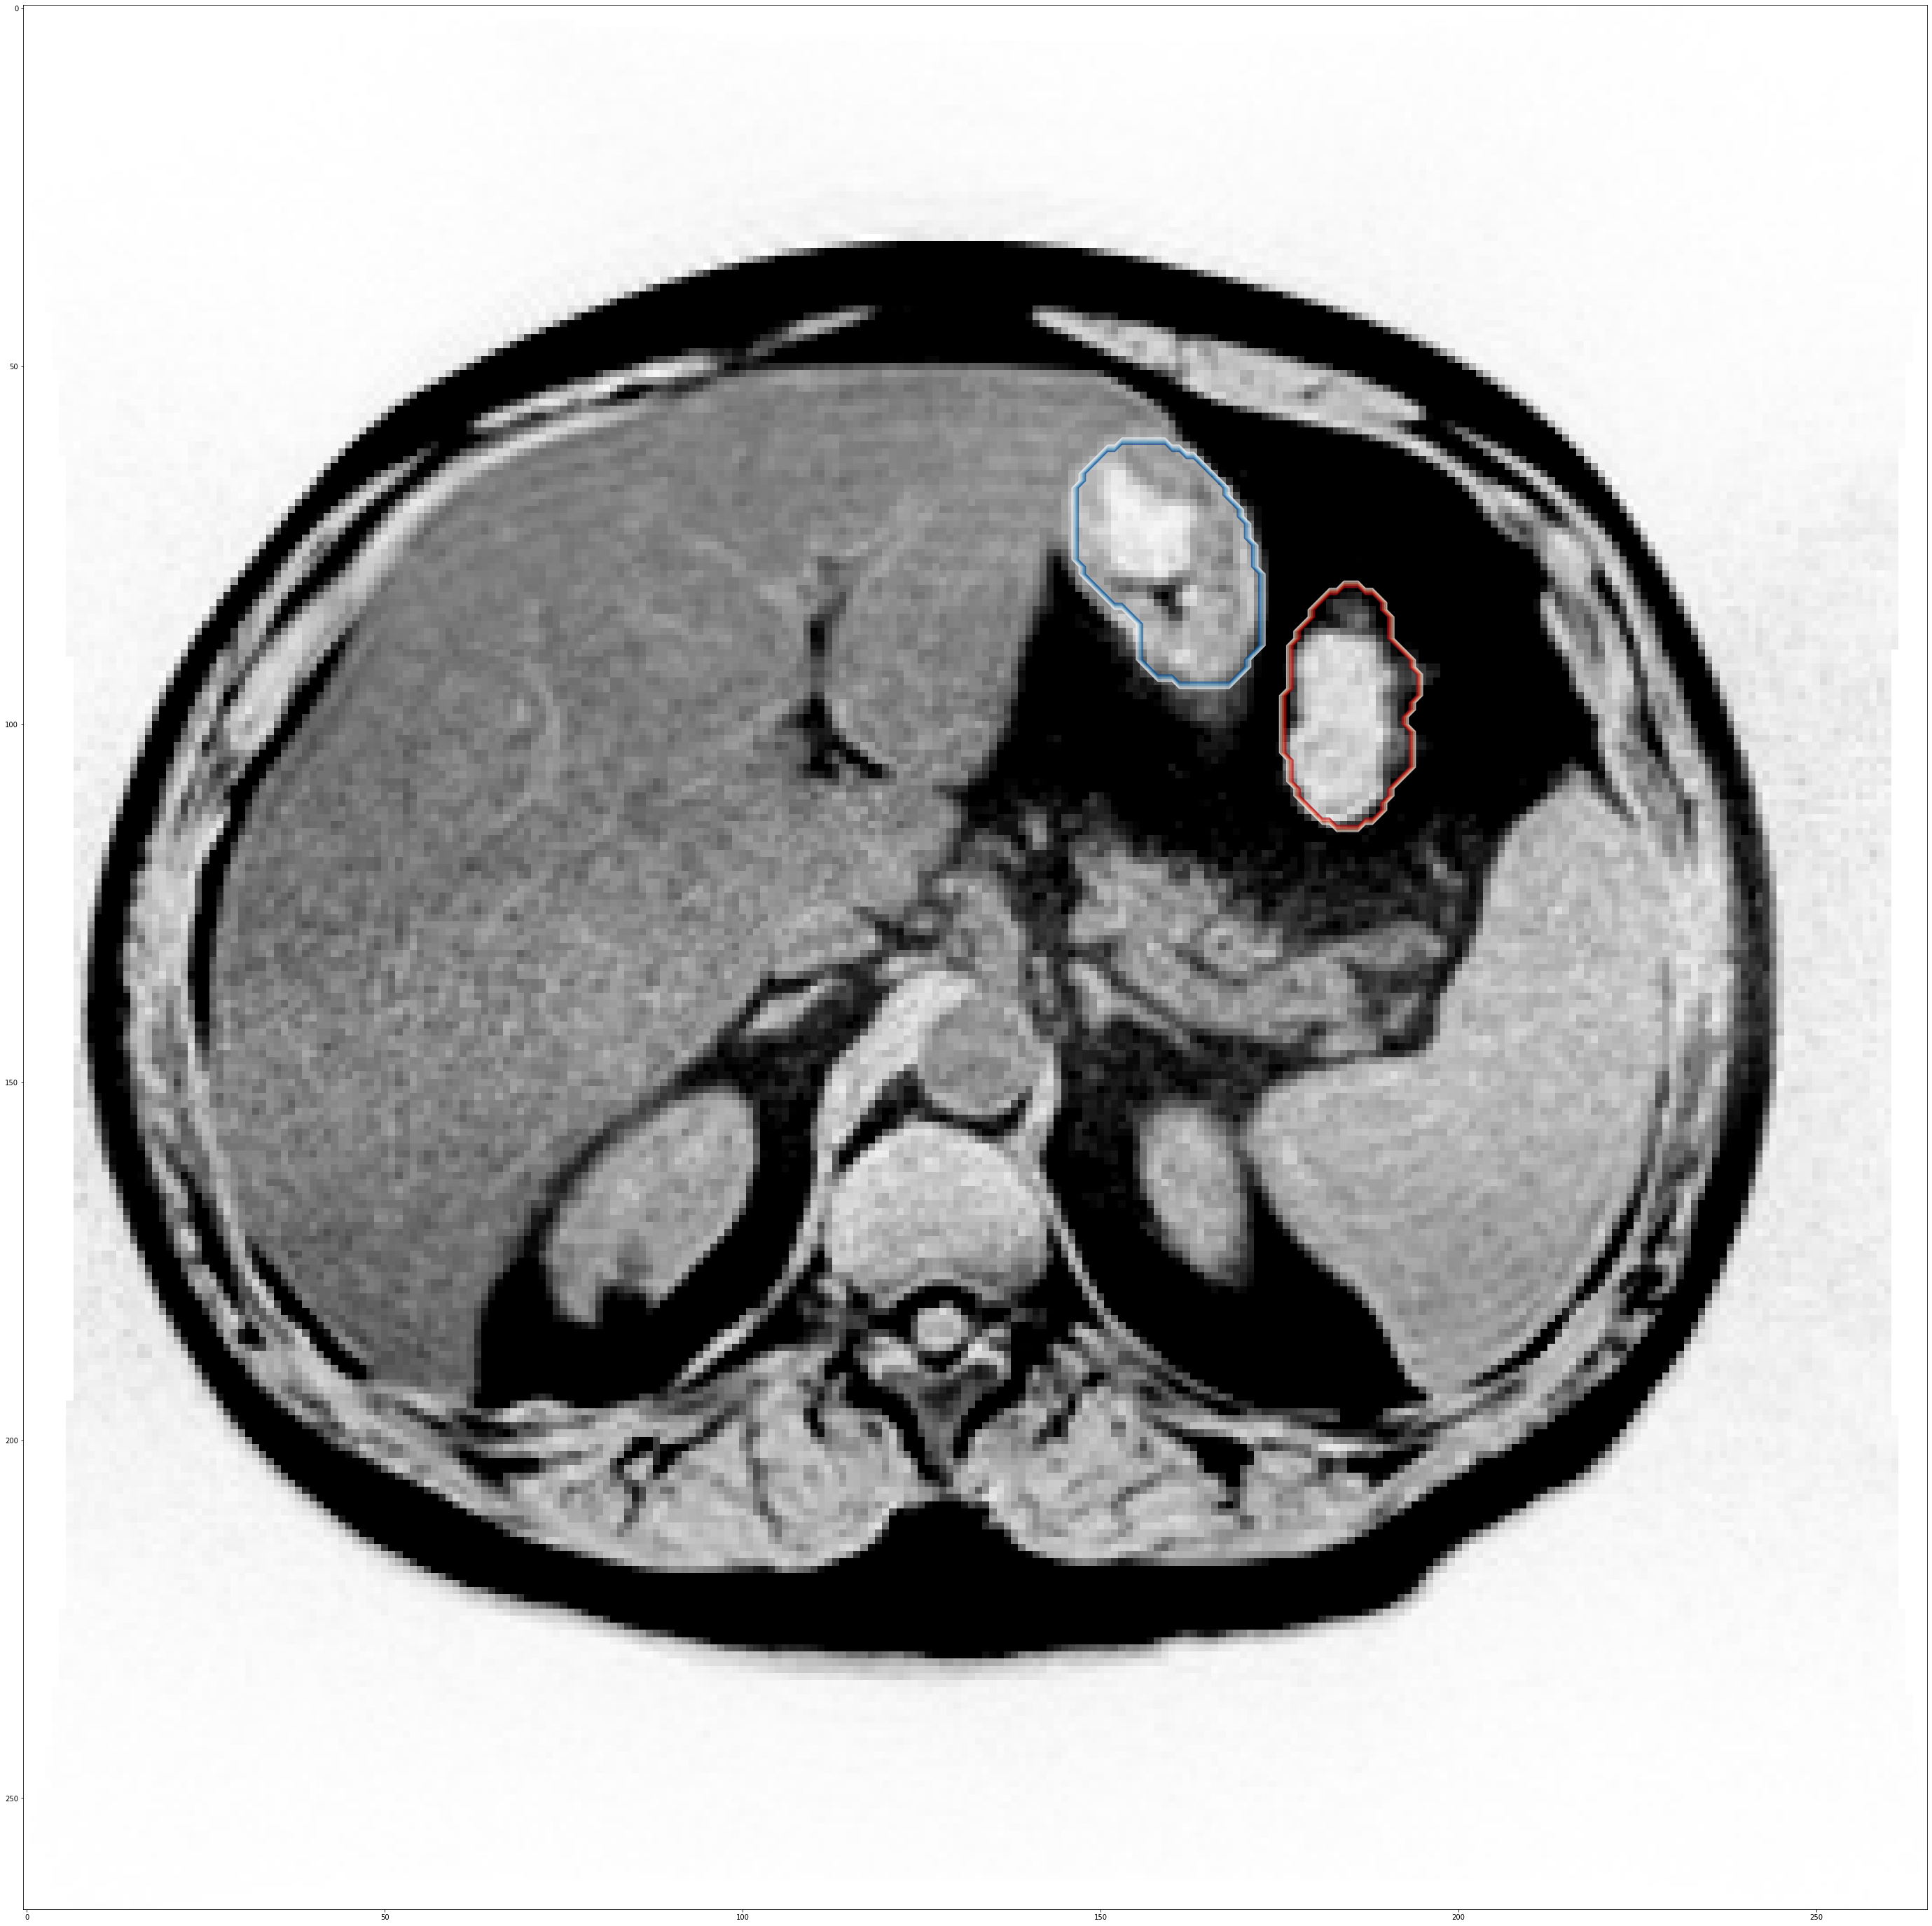

In [50]:
img = mpimg.imread('/content/drive/MyDrive/UW Madison dataset/case123/case123_day0/scans/slice_0065_266_266_1.50_1.50.png');
img /= img.max();
fig, ax = plt.subplots(1,1,figsize=(50,50))
ax.imshow(img,cmap='gray_r',vmin=0, vmax=0.5); # to increase the contrast, I limit to Vmax to 0.5
ax.contour(rle2mask(seg[0],(266,266)),cmap='Reds',alpha=0.7,vmin=0, vmax=1);
ax.contour(rle2mask(seg[2],(266,266)),cmap='Blues',alpha=0.7,vmin=0, vmax=1);